## Actuator Line Model Calibrations
### Author: Gopal R. Yalla


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline


In [6]:
#helper function for reading openfast .out file
def read_openfast_out_file(file,trange,varnames):
    print("Reading file: ",file)
    df = pd.read_csv(file,sep='\s+',skiprows=(0,1,2,3,4,5,7), comment='#', usecols=lambda col: any(keyword in col for keyword in varnames))
    df.drop_duplicates(subset='Time', inplace=True)
    total_time = trange[-1]-trange[0]
    mask = (df['Time'] >= trange[0]) & (df['Time'] <= trange[-1])
    filtered_df = df[mask]
    mean_df = pd.DataFrame(columns=df.columns)
    mean_df.loc[0] = filtered_df.mean()
    return mean_df

### LOAD STAND ALONE OPENFAST DATA

In [9]:
openfast_basedir = '/gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/'
wsvec   = np.arange(3, 15, 0.5)

### use this section to postprocess openFAST data
trange = [120,700]
varnames = ['Time','GenPwr', 'RotSpeed', 'RotTorq','RotThrust']
openfast_data = {}
for ws in wsvec:
    file = openfast_basedir + "iea15mw_" + str(ws) + "mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out"
    openfast_data[ws] = read_openfast_out_file(file,trange,varnames)

### use this section if openFAST data was postprocessed with the AMR-Wind postprocessing engine
#openfast_data = {}
#for ws in wsvec:
#    datafile = openfast_basedir+'/T0_'+str(ws) + '_mean.csv'
#    df = pd.read_csv(datafile)
#    openfast_data[ws] = df

Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_3.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_3.5mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_4.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_4.5mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_5.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_5.5mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT

### LOAD AMR_WIND DATA

In [10]:
trange = [300, 360]
varnames = ['Time','GenPwr', 'RotSpeed', 'RotTorq','RotThrust']

wind_speeds = [5.0,6.5,9.0,11.0,14.0]

amr_wind_dirs = {}
#Add AMR-Wind Dirs here for each wind
basedir  = '/ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM/'

basedir2  = '/ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM_FLLC/'

amr_wind_dirs[9.0] = [
    # DIRETORY , LABEL, COLOR
    (basedir + 'Calibrate_dx2p50_A1_EPS1.00_WS_9.0','eps=1.0','tab:purple'),
    (basedir + 'Calibrate_dx2p50_A1_EPS2.00_WS_9.0','eps=2.0','tab:blue'),
    (basedir + 'Calibrate_dx2p50_A1_EPS3.00_WS_9.0','eps=3.0','tab:green'),
    (basedir + 'Calibrate_dx2p50_A1_EPS4.00_WS_9.0','eps=4.0','tab:orange'),
    (basedir + 'Calibrate_dx2p50_A1_EPS5.00_WS_9.0','eps=5.0','tab:olive'),
    (basedir + 'Calibrate_dx2p50_A1_EPS10.00_WS_9.0','eps=10.0','tab:brown'),
]

basedir1 = '/ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM_EPS2.0/'
amr_wind_dirs[6.5] = [
    # DIRETORY , LABEL, COLOR
    (basedir1 + 'Calibrate_dx2p50_A1_EPS2.00_WS_6.5','eps=2.0','tab:blue'),
    (basedir + 'Calibrate_dx2p50_A0_EPS3.00_WS_6.5','eps=3.0','tab:green'),
    (basedir + 'Calibrate_dx2p50_A0_EPS4.00_WS_6.5','eps=4.0','tab:orange'),
    (basedir + 'Calibrate_dx2p50_A0_EPS5.00_WS_6.5','eps=5.0','tab:olive'),
    (basedir + 'Calibrate_dx2p50_A0_EPS10.00_WS_6.5','eps=10.0','tab:brown'),
]

amr_wind_dirs[5.0] = [
    # DIRETORY , LABEL, COLOR
    (basedir1 + 'Calibrate_dx2p50_A0_EPS2.00_WS_5.0','eps=2.0','tab:blue'),
]

amr_wind_dirs[11.0] = [
    # DIRETORY , LABEL, COLOR
    (basedir1 + 'Calibrate_dx2p50_A3_EPS2.00_WS_11.0','eps=2.0','tab:blue'),
]

amr_wind_dirs[14.0] = [
    # DIRETORY , LABEL, COLOR
    (basedir1 + 'Calibrate_dx2p50_A4_EPS2.00_WS_14.0','eps=2.0','tab:blue'),
]


amr_wind_data = {}
for ws in wind_speeds:
    amr_wind_data[ws] = {}
    for dir in amr_wind_dirs[ws]:
        file = dir[0] + "/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out"
        amr_wind_data[ws][dir[1]] = read_openfast_out_file(file,trange,varnames)

Reading file:  /ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM_EPS2.0/Calibrate_dx2p50_A0_EPS2.00_WS_5.0/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM_EPS2.0/Calibrate_dx2p50_A1_EPS2.00_WS_6.5/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM/Calibrate_dx2p50_A0_EPS3.00_WS_6.5/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM/Calibrate_dx2p50_A0_EPS4.00_WS_6.5/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM/Calibrate_dx2p50_A0_EPS5.00_WS_6.5/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RW

### LOAD THE DESIGN CURVE (Optional)

In [ ]:
# Get original design power curve
# Note that this file is available at https://github.com/NREL/openfast-turbine-models/tree/master/IEA-scaled/NREL-2.8-127
design_curve_df = pd.read_csv('IEA-15-240-RWT_tabular.csv')
varnames_mapping = {
    #VARIABLE, SCALING
    'GenPwr' : ('Power [MW]',1000),
    'RotSpeed': ('Rotor Speed [rpm]',1),
    'RotTorq': ('Torque [MNm]',1000),
    'RotThrust': ('Thrust [MN]',1000)
}


### PLOT CURVES

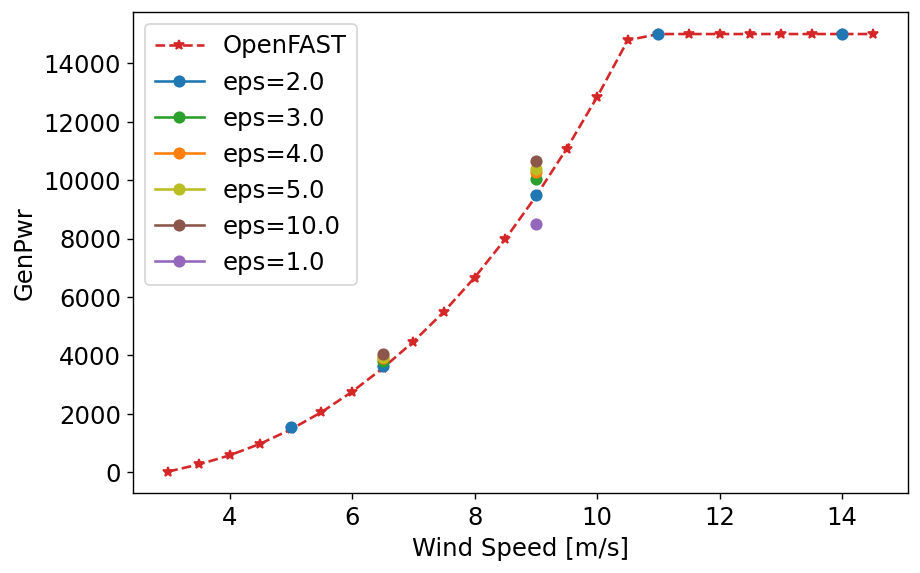

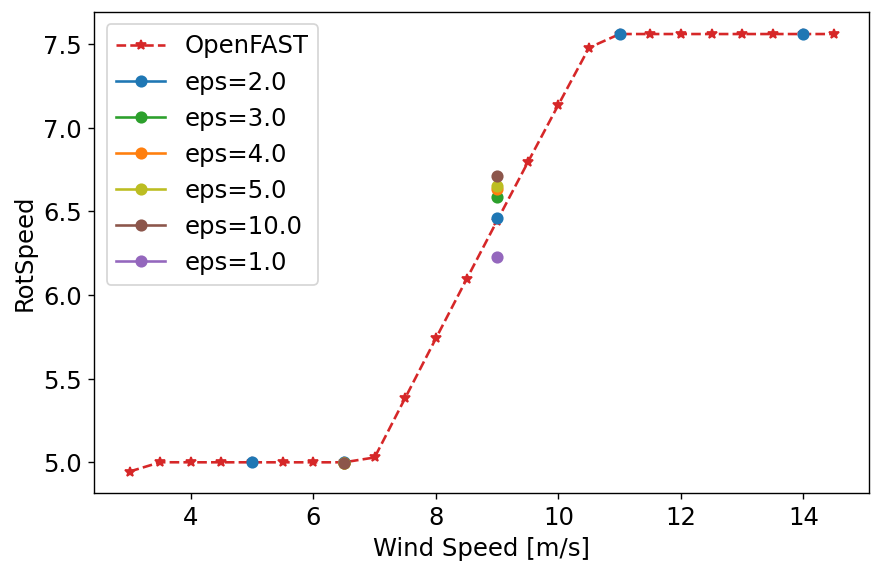

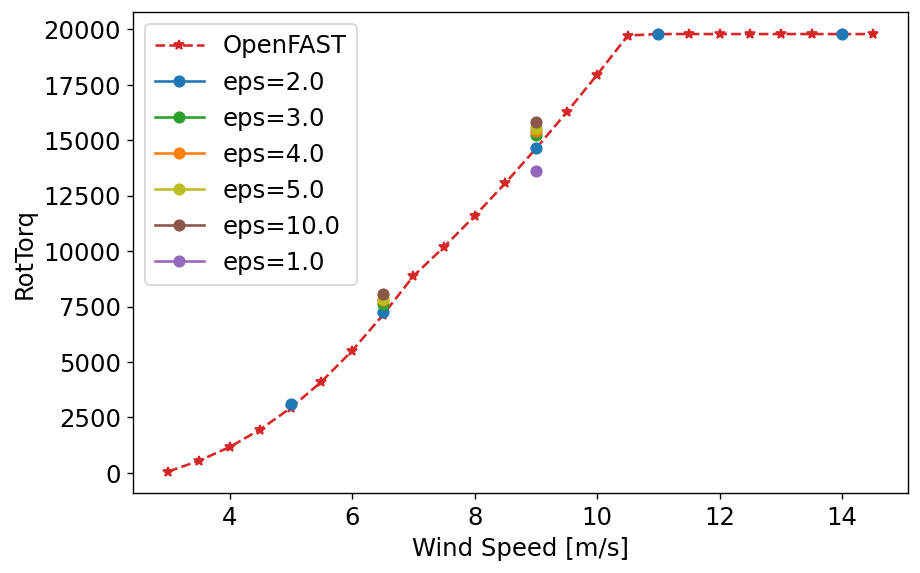

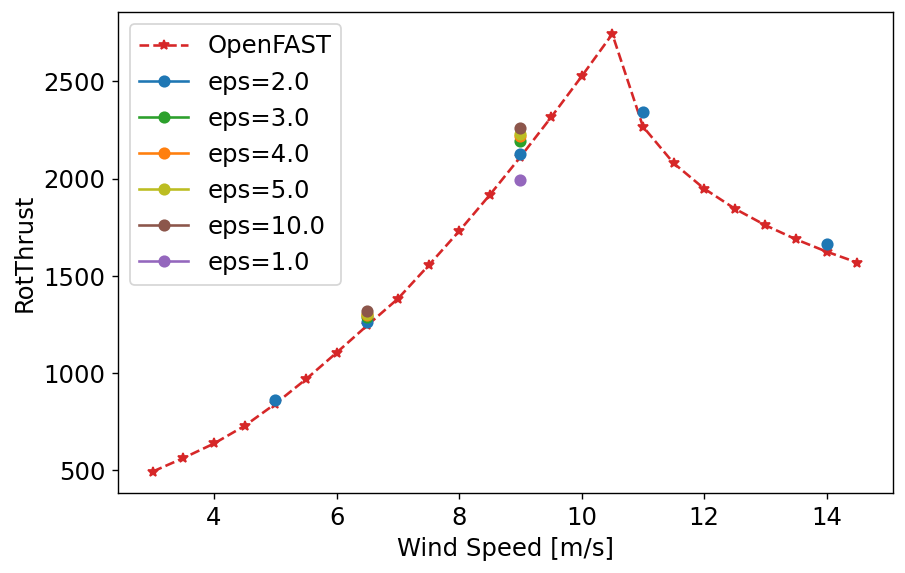

In [19]:
# Put curves to plot here
figsize = (4,4)
dpi     = 125
fsize=14
turbmodel = 'IEA 15MW'
for variter, var in enumerate(varnames[1:]):
    fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=125)
    ax.set_xlabel("Wind Speed [m/s]",fontsize=fsize)
    ax.set_ylabel(var,fontsize=fsize)
    plt.tick_params(axis='both', labelsize=fsize)  # Change labelsize here

    ### PLOT THE DESIGN CURVE DATA
    try:
       plt.plot(design_curve_df['Wind [m/s]'],design_curve_df[varnames_mapping[var][0]]*varnames_mapping[var][1],ls='-.',color='k',label="Design Curve")
    except:
       print("Error: variable not in design curve")

    ### PLOT THE Stand Alone OpenFAST Data
    try:
        xs = []
        ys = []
        for wsiter, ws in enumerate(wsvec):
            xs.append(ws)
            ys.append(openfast_data[ws][var])
        label='OpenFAST'
        plt.plot(xs,ys,marker='*',markerfacecolor='tab:red', markeredgecolor='tab:red',c='tab:red',label=label,ls='--')
    except:
        print("Error: variable not in openfast data")

    ### PLOT THE AMR_WIND DATA
    try:
        for ws in wind_speeds:
            for dir in amr_wind_dirs[ws]:
                plt.plot(ws,amr_wind_data[ws][dir[1]][var][0],marker='.',label=dir[1],c=dir[2],markersize=12)
    except:
        print("Error: variable not in amr_wind data")

    ax.legend(fontsize=fsize)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Create a dictionary to keep unique labels
    plt.legend(by_label.values(), by_label.keys(),fontsize=fsize)

### PRINT RELATIVE ERROR BETWEEN ARM-WIND AND OPENFAST

In [20]:
# Put curves to plot here
for variter, var in enumerate(varnames[1:]):
    print("QOI: ",var)
    print()
    try:
        for ws in wind_speeds:
            print("Wind Speed: ",ws)
            print("_________")
            of_data = openfast_data[ws][var][0]
            for dir in amr_wind_dirs[ws]:
                amr_data = amr_wind_data[ws][dir[1]][var][0]
                print(dir[1],": Rel. Err. = ",abs(amr_data-of_data)/abs(of_data))
        print("_________")
        print()
            
    except:
        print("Error: variable not found") 

QOI:  GenPwr

Wind Speed:  5.0
_________
eps=2.0 : Rel. Err. =  0.05162532221315417
Wind Speed:  6.5
_________
eps=2.0 : Rel. Err. =  0.018074083918068404
eps=3.0 : Rel. Err. =  0.07238383019320695
eps=4.0 : Rel. Err. =  0.09402831710851249
eps=5.0 : Rel. Err. =  0.1053373978244703
eps=10.0 : Rel. Err. =  0.13674282507825197
Wind Speed:  9.0
_________
eps=1.0 : Rel. Err. =  0.10100034670971071
eps=2.0 : Rel. Err. =  0.0033412576333147798
eps=3.0 : Rel. Err. =  0.06331796848048395
eps=4.0 : Rel. Err. =  0.08632682157712894
eps=5.0 : Rel. Err. =  0.09730429887689669
eps=10.0 : Rel. Err. =  0.12646086380923321
Wind Speed:  11.0
_________
eps=2.0 : Rel. Err. =  1.4766792543242632e-06
Wind Speed:  14.0
_________
eps=2.0 : Rel. Err. =  1.053522443766954e-06
_________

QOI:  RotSpeed

Wind Speed:  5.0
_________
eps=2.0 : Rel. Err. =  0.00015436410318011133
Wind Speed:  6.5
_________
eps=2.0 : Rel. Err. =  0.00018849867313149645
eps=3.0 : Rel. Err. =  0.00023552809294174345
eps=4.0 : Rel. Err.

### PLOT BLADE LOADING

In [22]:
trange = [300, 360]
Nr = 50  #number of blade points
b1FxLabels = ["AB%iN%03iFx"%(i,j) for i in [1,] for j in range(1,Nr+1)]
b1FyLabels = ["AB%iN%03iFy"%(i,j) for i in [1,] for j in range(1,Nr+1)]
b1Flabels = ['Time',] + b1FxLabels + b1FyLabels 

openfast_blade_data= {}
for ws in wind_speeds:
    file = openfast_basedir + "iea15mw_" + str(ws) + "mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out"
    openfast_blade_data[ws] = read_openfast_out_file(file,trange,b1Flabels)

amr_wind_blade_data = {}
for ws in wind_speeds:
    amr_wind_blade_data[ws] = {}
    for dir in amr_wind_dirs[ws]:
        file = dir[0] + "/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out"
        amr_wind_blade_data[ws][dir[1]] = read_openfast_out_file(file,trange,b1Flabels)


Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_5.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_6.5mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_9.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_11.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /gpfs/gyalla/Stand_alone_OpenFAST/IEA15MW_Calibration/AWC_2p0_noshear/IEA15MW/baseline/iea15mw_14.0mps/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
Reading file:  /ascldap/users/gyalla/GPFS/IEA15MW_Calibrations/IEA15MW_Calibration_AMR_ALM_EPS2.0/Calibrate_dx2p50_A0_EPS2.00_WS_5.0/T0_AMR_OpenFAST3p4_I

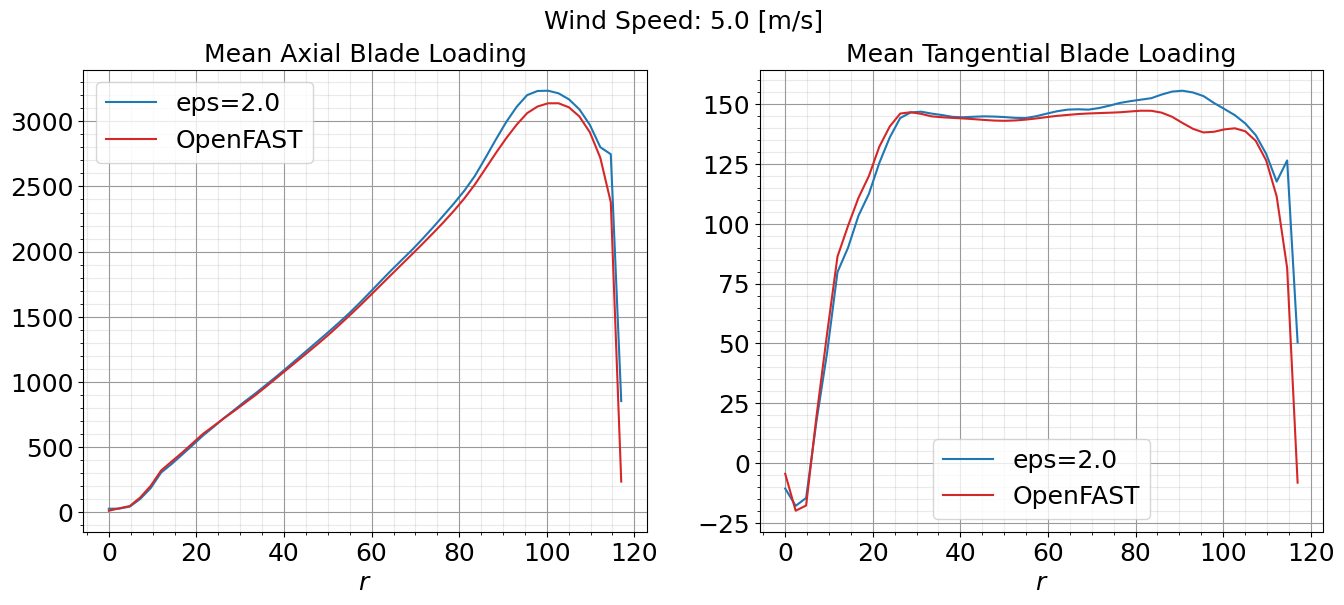

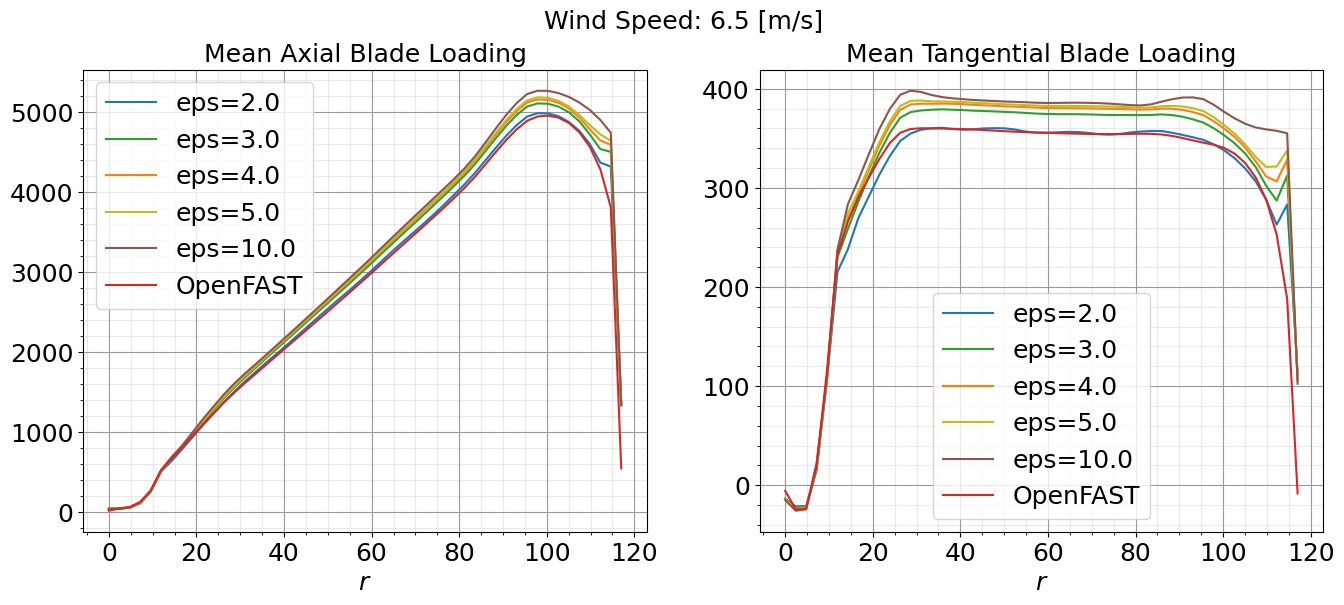

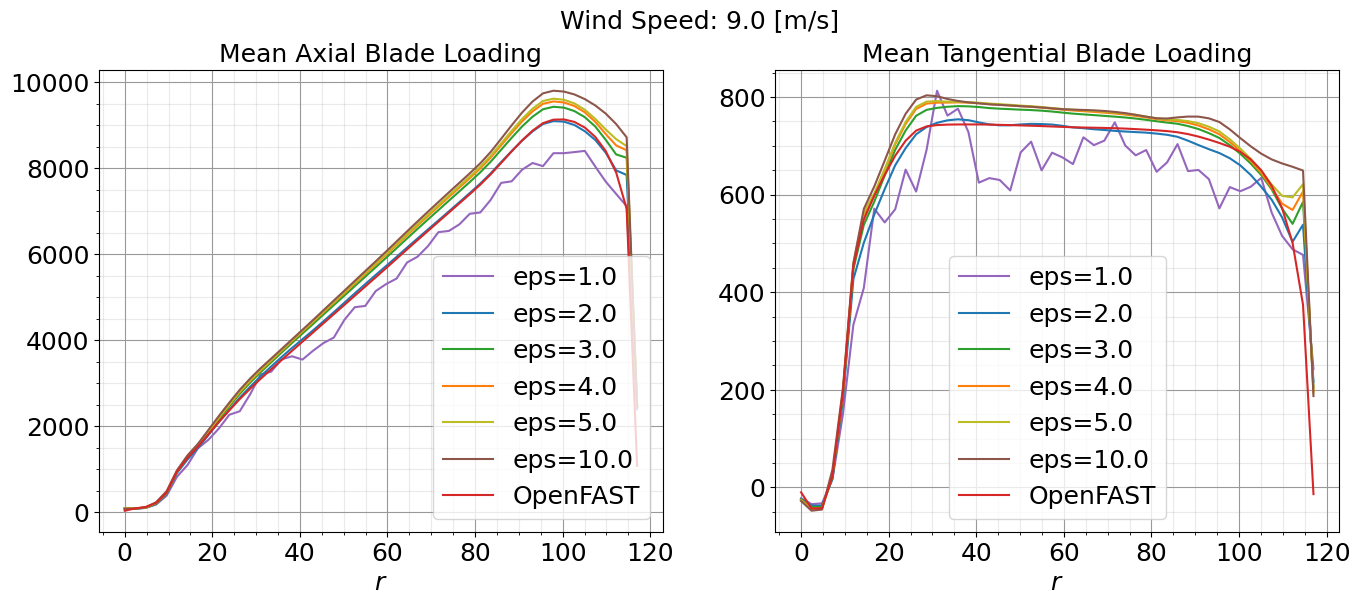

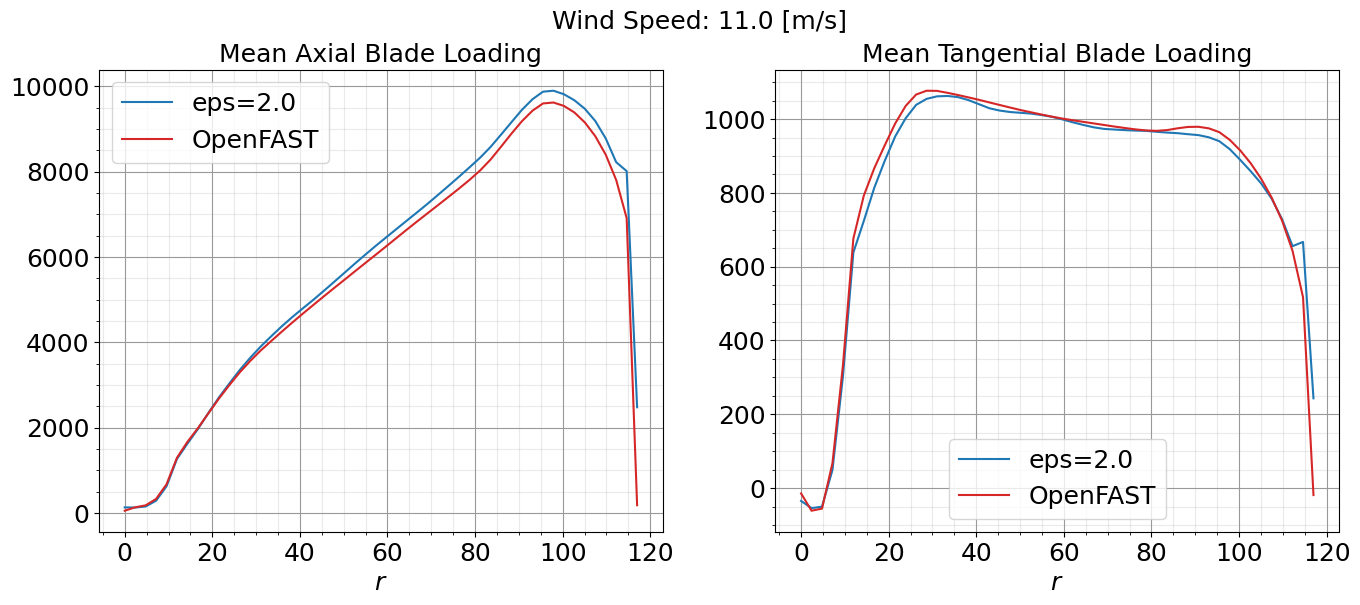

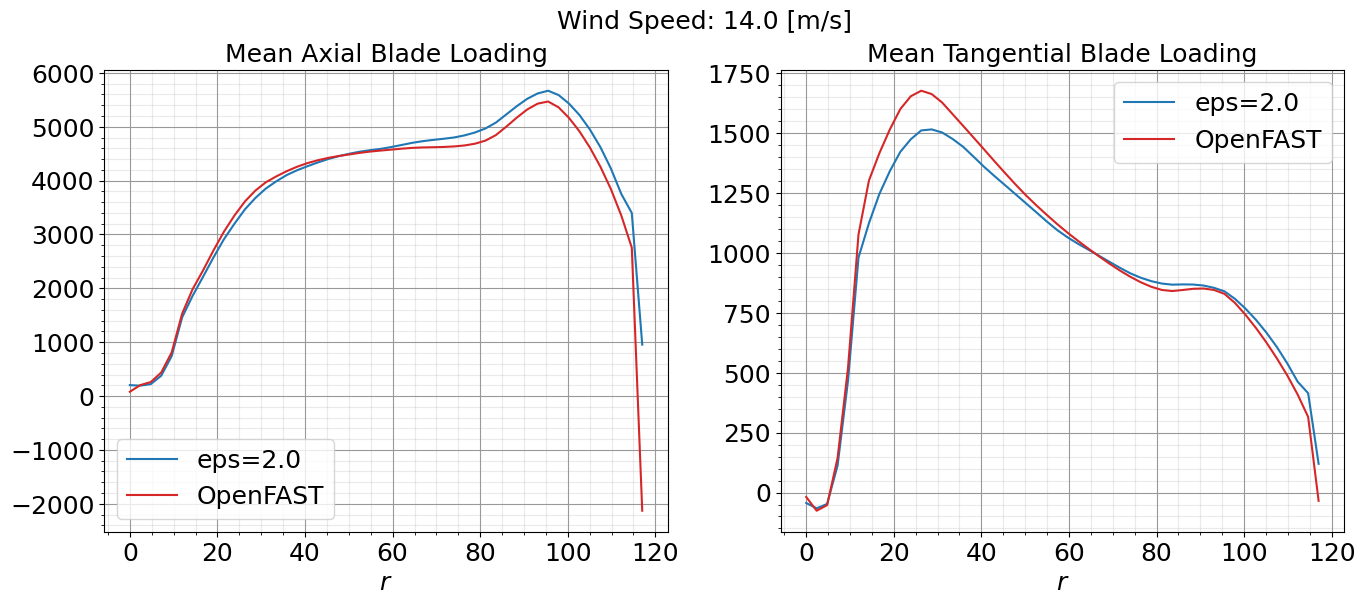

In [23]:
blades=[1]

bladefile = amr_wind_dirs[wind_speeds[0]][0][0] + '/T0_AMR_OpenFAST3p4_IEA15MW/IEA-15-240-RWT/IEA-15-240-RWT_AeroDyn15_blade.dat'

rdat  = np.loadtxt(bladefile, skiprows=6)
rvec = rdat[:,0]
fsize = 18


for ws in wind_speeds:
    fig, axs = plt.subplots(1,2,sharex=True,figsize=(16,6))
    fig.suptitle("Wind Speed: "+str(ws)+ ' [m/s]',fontsize=fsize)
    ax1 = axs[0]
    ax2 = axs[1]
    for dir in amr_wind_dirs[ws]:
        data = amr_wind_blade_data[ws][dir[1]][b1FxLabels].values.reshape(-1)
        ax1.plot(rvec,data,label=dir[1],c=dir[2])

        data = amr_wind_blade_data[ws][dir[1]][b1FyLabels].values.reshape(-1)
        ax2.plot(rvec,data,label=dir[1],c=dir[2])

    data = openfast_blade_data[ws][b1FxLabels].values.reshape(-1)
    ax1.plot(rvec,data,label='OpenFAST',c='tab:red')

    data = openfast_blade_data[ws][b1FyLabels].values.reshape(-1)
    ax2.plot(rvec,data,label='OpenFAST',c='tab:red')


    ax1.set_title("Mean Axial Blade Loading",fontsize=fsize)
    ax2.set_title("Mean Tangential Blade Loading",fontsize=fsize)
    ax1.set_xlabel("$r$",fontsize=fsize)
    ax2.set_xlabel("$r$",fontsize=fsize)
    ax1.grid(visible=True, which='major', color='#999999', linestyle='-')
    ax1.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax2.grid(visible=True, which='major', color='#999999', linestyle='-')
    ax2.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax1.minorticks_on()
    ax2.minorticks_on()
    ax1.tick_params(axis='x',labelsize=fsize)
    ax1.tick_params(axis='y',labelsize=fsize)
    ax2.tick_params(axis='x',labelsize=fsize)
    ax2.tick_params(axis='y',labelsize=fsize)
    ax1.legend(fontsize=fsize)
    ax2.legend(fontsize=fsize)